In [206]:
import numpy as np
import pandas as pd

# Loading the dataset as a DataFrame

In [207]:
#Loading dataset as dataframe
df = pd.read_csv('heart failur classification dataset.csv')
df.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1


In [208]:
df.shape

(299, 14)

In [209]:
#droping the 'unnamed: 0' column from the data-set
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [210]:
df.shape

(299, 13)

In [211]:
df.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1


# Handling the null values of the features with SimpleImputer
### Depending on the dataset, we would have handled the null values of the label also if the label consists of null values.

In [212]:
#null value check of the features
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,True,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [213]:
#Total null values in each feature
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [214]:
from sklearn.impute import SimpleImputer

# Imputing the serum_sodium column's NaN values with mean strategy
impute1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute1.fit(df[['serum_sodium']])

df['serum_sodium'] = impute1.transform(df[['serum_sodium']])

# Imputing the time column's NaN values with mean strategy
impute2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')

impute2.fit(df[['time']])

df['time'] = impute2.transform(df[['time']])

In [215]:
#Checking if the NaN values are filled or not.
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [216]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,No,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,No,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,Yes,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,No,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,No,8.0,1


# Encoding the categorical features
### Depending on the dataset, we would have encoded the label also if the label is categorical.

In [217]:
#Finding the categorical features and total cateogies of that feature
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [218]:
df['smoking'].unique()

array(['No', 'Yes'], dtype=object)

In [219]:
from sklearn.preprocessing import LabelEncoder

#Encoding the smocking categorical feature
encoder1 = LabelEncoder()

##creating a new column to store the encoded values and comparing the categorical feature with the encoded categorical feature
# df['smoking_encoded'] = encoder1.fit_transform(df['smoking'])
# print(df[['smoking', 'smoking_encoded']].head())

df['smoking'] = encoder1.fit_transform(df['smoking'])
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,Male,0,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,Male,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,Male,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,Male,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,Female,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.000000,Male,1,8.0,1
6,75.0,1,246,0,15,0,127000.00,1.2,137.000000,Male,0,10.0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131.000000,Male,1,10.0,1
8,65.0,0,157,0,65,0,263358.03,1.5,138.000000,Female,0,10.0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133.000000,Male,1,10.0,1


In [220]:
#Encoding the sex categorical feature
encoder2 = LabelEncoder()

##creating a new column to store the encoded values and comparing the categorical feature with the encoded categorical feature
# df['sex_encoded'] = encoder2.fit_transform(df['sex'])
# print(df[['sex', 'sex_encoded']].head())

df['sex'] = encoder2.fit_transform(df['sex'])
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,1,0,4.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132.000000,1,1,8.0,1
6,75.0,1,246,0,15,0,127000.00,1.2,137.000000,1,0,10.0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131.000000,1,1,10.0,1
8,65.0,0,157,0,65,0,263358.03,1.5,138.000000,0,0,10.0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133.000000,1,1,10.0,1


# Taking the features and labels

In [221]:
# Selecting the features
features = df.iloc[: , :-1]
features.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,136.675768,1,0,4.0
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0


In [222]:
#selecting the labels
labels = df[['DEATH_EVENT']]
labels

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


# Scaling the features
### Depending on the dataset, we would have scaled the label also if the label values required scaling.

In [223]:
from sklearn.preprocessing import StandardScaler

#Scaling the feature values with StandardScaler
scaler = StandardScaler()
scaler.fit(features)

features_Standard_scaled = scaler.transform(features)

# Splitting the scaled features and labels of the dataset into training and testing set

In [224]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_Standard_scaled, labels, test_size=0.2, random_state=1)

# Support Vector Machine Classifier

In [225]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel="linear")

svm_classifier.fit(x_train, y_train)

C:\Users\DIPTO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [226]:
# ## One way to check the accuracy of the model. Used in previous labs.

# from sklearn.metrics import accuracy_score

# svm_classifier_predictions = svm_classifier.predict(x_test)
# svm_classifier_score = accuracy_score(y_test, svm_predictions)

In [227]:
## Another way to check training and testing accuracy

svm_classifier_train_score = svm_classifier.score(x_train, y_train)

svm_classifier_test_score = svm_classifier.score(x_test, y_test)

In [228]:
print("Training accuracy of the model is {:.2f}".format(svm_classifier_train_score))
print("Testing accuracy of the model is {:.2f}".format(svm_classifier_test_score))

Training accuracy of the model is 0.82
Testing accuracy of the model is 0.85


In [229]:
svm_pred = svm_classifier.predict(x_test)

In [230]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(svm_pred, y_test)
print(conf_matrix)

[[41  4]
 [ 5 10]]


<AxesSubplot:>

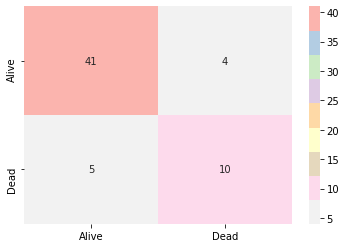

In [231]:
from seaborn import heatmap
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Alive' ,'Dead'], yticklabels=['Alive' ,'Dead'], annot=True)

# Random Forest Classifier

In [232]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=50)
rf_classifier.fit(x_train, y_train)

<ipython-input-232-15c7fdb5543c>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50)

In [233]:
rf_classifier_train_score = rf_classifier.score(x_train, y_train)
rf_classifier_test_score = rf_classifier.score(x_test, y_test)

In [234]:
print("The Training accuracy of the model is {:.2f}".format(rf_classifier_train_score))
print("The Testing accuracy of the model is {:.2f}".format(rf_classifier_test_score))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.93


In [235]:
rf_classifier_pred = rf_classifier.predict(x_test)

In [236]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(rf_classifier_pred, y_test)
conf_matrix

array([[45,  3],
       [ 1, 11]], dtype=int64)

<AxesSubplot:>

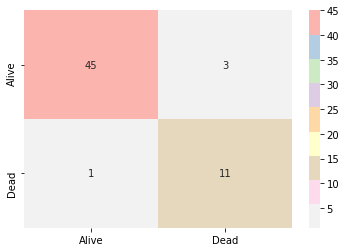

In [237]:
from seaborn import heatmap
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Alive' ,'Dead'], yticklabels=['Alive' ,'Dead'], annot=True)

# Neural Network (Multilayer Perceptron)

In [238]:
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
neural_network.fit(x_train, y_train)

C:\Users\DIPTO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [239]:
neural_network_train_score = neural_network.score(x_train, y_train)
neural_network_test_score = neural_network.score(x_test, y_test)

In [240]:
print("The Training accuracy of the model is {:.2f}".format(neural_network_train_score))
print("The Testing accuracy of the model is {:.2f}".format(neural_network_test_score))

The Training accuracy of the model is 0.91
The Testing accuracy of the model is 0.83


In [241]:
neural_network_pred = neural_network.predict(x_test)
print(neural_network_pred)

[0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]


In [242]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(neural_network_pred, y_test)
conf_matrix

array([[40,  4],
       [ 6, 10]], dtype=int64)

<AxesSubplot:>

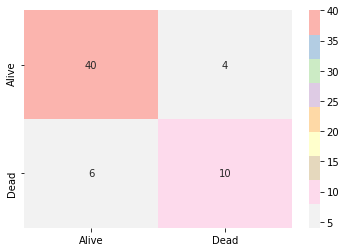

In [243]:
from seaborn import heatmap
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Alive' ,'Dead'], yticklabels=['Alive' ,'Dead'], annot=True)

# Dimensionality Reduction Using PCA

In [244]:
features_Standard_scaled

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.64117794e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.61497294e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.60187044e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.94890722e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.97511222e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  3.72395464e-16]])

In [245]:
features_Standard_scaled.shape

(299, 12)

In [246]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=6)

In [247]:
reduced_features = pca.fit_transform(features_Standard_scaled)
reduced_features

array([[ 0.8756325 ,  1.85387191,  0.13395688,  1.42314106,  0.06194694,
        -1.39868872],
       [ 1.81636705, -1.75663616,  0.7544953 ,  3.81861712,  4.57216682,
        -2.34955099],
       [ 2.61335743,  1.17317111,  1.34199483, -0.1413596 , -0.53297446,
        -0.45830977],
       ...,
       [-2.64347331, -3.68916297, -0.19784408,  2.70710241, -0.15762567,
         2.9698114 ],
       [ 2.05073391, -2.54559838, -0.35776122, -0.57930961,  1.43473073,
        -0.43204721],
       [ 1.32979667, -0.87735928, -0.49987684,  0.51960581, -0.55719558,
         1.58531739]])

In [248]:
reduced_features.shape

(299, 6)

In [249]:
sum(pca.explained_variance_ratio_)  ##almost 37% of data lost

0.6353169095187255

# Creating a new dataframe with reduced features and then adding the labels into the dataframe

In [250]:
column_names = ["PrincipalComponent "+str(i) for i in range(1,7)]
new_df = pd.DataFrame(data=reduced_features, columns=column_names)
new_df.head()

,PrincipalComponent 1,PrincipalComponent 2,PrincipalComponent 3,PrincipalComponent 4,PrincipalComponent 5,PrincipalComponent 6
0,0.875632,1.853872,0.133957,1.423141,0.061947,-1.398689
1,1.816367,-1.756636,0.754495,3.818617,4.572167,-2.349551
2,2.613357,1.173171,1.341995,-0.141360,-0.532974,-0.458310
3,0.666776,1.111922,0.631251,-0.996101,-0.172317,-1.261022
4,-0.814719,2.613153,4.601888,0.195460,-0.935351,0.851702


In [251]:
### three ways to add a new column to a dataframe

# new_df = new_df.assign(DEATH_EVENT=df["DEATH_EVENT"])
# new_df['DEATH_EVENT'] = df['DEATH_EVENT']
new_df = pd.concat([new_df, df[["DEATH_EVENT"]]], axis=1)

new_df.head()

,PrincipalComponent 1,PrincipalComponent 2,PrincipalComponent 3,PrincipalComponent 4,PrincipalComponent 5,PrincipalComponent 6,DEATH_EVENT
0,0.875632,1.853872,0.133957,1.423141,0.061947,-1.398689,1
1,1.816367,-1.756636,0.754495,3.818617,4.572167,-2.349551,1
2,2.613357,1.173171,1.341995,-0.141360,-0.532974,-0.458310,1
3,0.666776,1.111922,0.631251,-0.996101,-0.172317,-1.261022,1
4,-0.814719,2.613153,4.601888,0.195460,-0.935351,0.851702,1


In [252]:
# Selecting the features
new_features = new_df.iloc[: , :-1]
new_features.head()

,PrincipalComponent 1,PrincipalComponent 2,PrincipalComponent 3,PrincipalComponent 4,PrincipalComponent 5,PrincipalComponent 6
0,0.875632,1.853872,0.133957,1.423141,0.061947,-1.398689
1,1.816367,-1.756636,0.754495,3.818617,4.572167,-2.349551
2,2.613357,1.173171,1.341995,-0.141360,-0.532974,-0.458310
3,0.666776,1.111922,0.631251,-0.996101,-0.172317,-1.261022
4,-0.814719,2.613153,4.601888,0.195460,-0.935351,0.851702


In [253]:
new_labels = new_df.iloc[:, [-1]]
new_labels

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


# Splitting the reduced features and labels into training set and testing set

In [254]:
from sklearn.model_selection import train_test_split

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_features, new_labels, test_size=0.2, random_state=1)

# Support Vector Machine Classifier after applying PCA

In [255]:
from sklearn.svm import SVC

new_svm_classifier = SVC(kernel="linear")

new_svm_classifier.fit(new_x_train, new_y_train)

C:\Users\DIPTO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [256]:
new_svm_classifier_train_score = new_svm_classifier.score(new_x_train, new_y_train)

new_svm_classifier_test_score = new_svm_classifier.score(new_x_test, new_y_test)

In [257]:
print("Training accuracy of the model is {:.2f}".format(new_svm_classifier_train_score))
print("Testing accuracy of the model is {:.2f}".format(new_svm_classifier_test_score))

Training accuracy of the model is 0.79
Testing accuracy of the model is 0.88


In [258]:
new_svm_pred = new_svm_classifier.predict(new_x_test)

In [259]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(new_svm_pred, new_y_test)
print(conf_matrix)

[[44  5]
 [ 2  9]]


<AxesSubplot:>

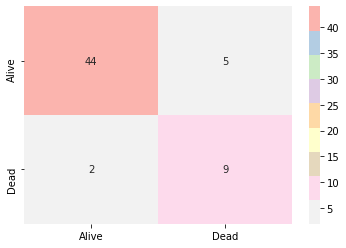

In [260]:
from seaborn import heatmap
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Alive' ,'Dead'], yticklabels=['Alive' ,'Dead'], annot=True)

# Random Forest classifier after applying PCA

In [261]:
from sklearn.ensemble import RandomForestClassifier

new_rf_classifier = RandomForestClassifier(n_estimators=50)
new_rf_classifier.fit(new_x_train, new_y_train)

<ipython-input-261-d8f5392b2c11>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  new_rf_classifier.fit(new_x_train, new_y_train)


RandomForestClassifier(n_estimators=50)

In [262]:
new_rf_classifier_train_score = new_rf_classifier.score(new_x_train, new_y_train)
new_rf_classifier_test_score = new_rf_classifier.score(new_x_test, new_y_test)

In [263]:
print("The Training accuracy of the model is {:.2f}".format(new_rf_classifier_train_score))
print("The Testing accuracy of the model is {:.2f}".format(new_rf_classifier_test_score))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.87


In [264]:
new_rf_classifier_pred = new_rf_classifier.predict(new_x_test)

In [265]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(new_rf_classifier_pred, new_y_test)
conf_matrix

array([[44,  6],
       [ 2,  8]], dtype=int64)

<AxesSubplot:>

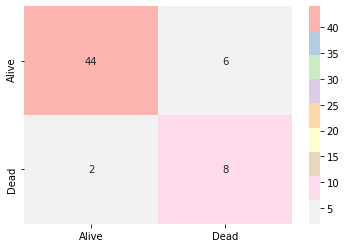

In [266]:
from seaborn import heatmap
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Alive' ,'Dead'], yticklabels=['Alive' ,'Dead'], annot=True)

# Neural Network (Multilayer Perceptron) after applying PCA

In [267]:
from sklearn.neural_network import MLPClassifier

new_neural_network = MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
new_neural_network.fit(new_x_train, new_y_train)

C:\Users\DIPTO\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [268]:
new_neural_network_train_score = new_neural_network.score(new_x_train, new_y_train)
new_neural_network_test_score = new_neural_network.score(new_x_test, new_y_test)

In [269]:
print("The Training accuracy of the model is {:.2f}".format(new_neural_network_train_score))
print("The Testing accuracy of the model is {:.2f}".format(new_neural_network_test_score))

The Training accuracy of the model is 0.79
The Testing accuracy of the model is 0.87


In [270]:
new_neural_network_pred = new_neural_network.predict(new_x_test)
print(new_neural_network_pred)

[0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0]


In [271]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(new_neural_network_pred, new_y_test)
conf_matrix

array([[44,  6],
       [ 2,  8]], dtype=int64)

<AxesSubplot:>

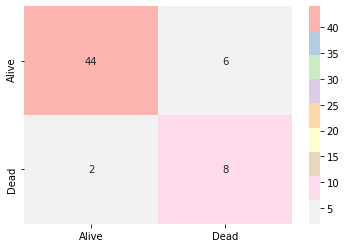

In [272]:
from seaborn import heatmap
heatmap(conf_matrix , cmap="Pastel1_r", xticklabels=['Alive' ,'Dead'], yticklabels=['Alive' ,'Dead'], annot=True)

# Comparing Pre-PCA and Post-PCA of each models on accuracies

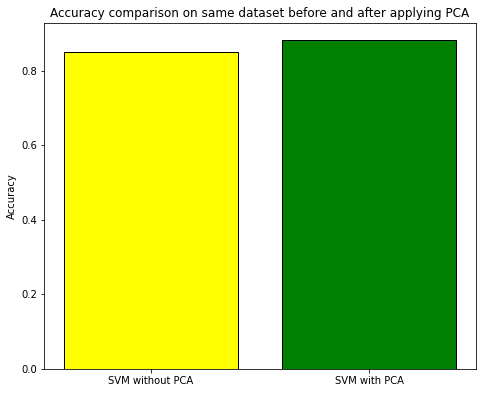

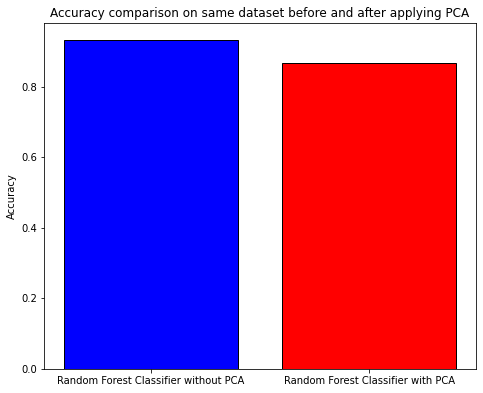

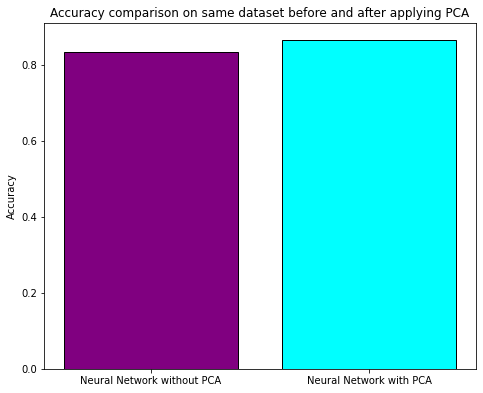

In [273]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([1,1,1,1.2])
ax.bar(['SVM without PCA', 'SVM with PCA'], [svm_classifier_test_score, new_svm_classifier_test_score], color=['yellow', 'green'],  edgecolor='black')
ax.set_title('Accuracy comparison on same dataset before and after applying PCA')
plt.ylabel('Accuracy')
plt.show()

fig = plt.figure()
ax = fig.add_axes([1,1,1,1.2])
ax.bar(['Random Forest Classifier without PCA', 'Random Forest Classifier with PCA'], [rf_classifier_test_score, new_rf_classifier_test_score], color=['blue', 'red'],  edgecolor='black')
ax.set_title('Accuracy comparison on same dataset before and after applying PCA')
plt.ylabel('Accuracy')
plt.show()

fig = plt.figure()
ax = fig.add_axes([1,1,1,1.2])
ax.bar(['Neural Network without PCA', 'Neural Network with PCA'], [neural_network_test_score, new_neural_network_test_score], color=['purple', 'cyan'],  edgecolor='black')
ax.set_title('Accuracy comparison on same dataset before and after applying PCA')
plt.ylabel('Accuracy')
plt.show()
